## Analisis Faktor

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from tabulate import tabulate

In [32]:
df = pd.read_csv("../data/pca_data.csv")
df.head()

,Unnamed: 0,trip_jarak,trip_pendapatan_bersih,trip_poin_tambahan,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,...,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,trip_jenis_pembayaran_Tunai
0,0,4.35,8800.0,150.0,3,34,0,3,1,0.0,...,1014,0,6.0,1205.529801,19.0,1,0,0,1,0
1,1,12.36,24800.0,150.0,3,34,0,3,1,0.0,...,1328,0,4.0,1193.483444,38.0,1,0,0,1,0
2,2,3.21,8000.0,150.0,3,34,0,3,1,0.0,...,1419,0,15.0,1157.443709,12.0,1,0,0,1,0
3,3,2.77,13600.0,150.0,3,34,0,3,1,0.0,...,2186,1,10.0,2028.569536,16.0,1,1,0,0,0
4,4,5.92,16400.0,150.0,3,34,0,3,1,0.0,...,2232,0,2.0,1357.251656,17.0,1,0,1,0,0


In [33]:
df_pca = df.drop('Unnamed: 0', axis=1)

In [34]:
df_pca.head()

,trip_jarak,trip_pendapatan_bersih,trip_poin_tambahan,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,sosdem_anggota_rt,...,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,trip_jenis_pembayaran_Tunai
0,4.35,8800.0,150.0,3,34,0,3,1,0.0,4,...,1014,0,6.0,1205.529801,19.0,1,0,0,1,0
1,12.36,24800.0,150.0,3,34,0,3,1,0.0,4,...,1328,0,4.0,1193.483444,38.0,1,0,0,1,0
2,3.21,8000.0,150.0,3,34,0,3,1,0.0,4,...,1419,0,15.0,1157.443709,12.0,1,0,0,1,0
3,2.77,13600.0,150.0,3,34,0,3,1,0.0,4,...,2186,1,10.0,2028.569536,16.0,1,1,0,0,0
4,5.92,16400.0,150.0,3,34,0,3,1,0.0,4,...,2232,0,2.0,1357.251656,17.0,1,0,1,0,0


In [39]:
keyword = 'loc'  # Kata kunci yang ingin Anda cari dalam nama kolom
df_pca.filter(like=keyword, axis=1)

,loc_jumlah_pasar,loc_jumlah_halte,loc_jumlah_stasiun,loc_jumlah_terminal,loc_jumlah_hotel,loc_jumlah_mall,loc_jumlah_ofm,loc_jumlah_pickup,loc_jumlah_dropoff,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,loc_avg_duration,loc_jumlah_pendidikan
0,1,0,0,0,5,1,66,625,668,13297,1014,0,6.0,1205.529801,7
1,1,3,0,1,6,0,16,128,128,7522,1328,0,4.0,1193.483444,7
2,0,3,0,0,14,0,44,147,191,10254,1419,0,15.0,1157.443709,15
3,0,2,0,0,14,0,68,262,400,20196,2186,1,10.0,2028.569536,7
4,1,0,0,0,6,0,32,245,225,13023,2232,0,2.0,1357.251656,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,1,2,0,0,21,1,163,1972,1070,2255,829,3,18.0,1188.013245,33
24412,0,0,0,0,1,0,29,106,129,38975,5928,0,7.0,1403.834437,11
24413,1,0,0,0,0,0,26,145,104,20762,2983,0,1.0,1369.615894,2
24414,0,0,0,0,0,0,99,75,145,22037,2198,0,9.0,1773.192053,19


In [36]:
df_pca['loc_jumlah_pendidikan'] = df_pca['loc_jumlah_sd']+df_pca['loc_jumlah_smp']+df_pca['loc_jumlah_sma']+df_pca['loc_jumlah_pt'] 

In [38]:
df_pca = df_pca.drop(['loc_jumlah_sd','loc_jumlah_smp', 'loc_jumlah_sma', 'loc_jumlah_pt'], axis=1)

In [40]:
def plot_correlation_matrix(data, title):
    correlation_matrix = data.corr()

    fig, ax = plt.subplots(figsize=(32, 24))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
    ax.set_title(title)

    # plt.savefig(title.lower().replace(" ", "_") + "_correlation_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()

def plot_covariance_matrix(data, title):
    covariance_matrix = data.cov()

    fig, ax = plt.subplots(figsize=(32, 24))
    sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
    ax.set_title(title)

    # plt.savefig(title.lower().replace(" ", "_") + "_covariance_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()


In [41]:
def perform_factor_analysis(data, n_factors, rotate=None, num_loadings=None):
    # Create factor analysis object and perform factor analysis
    fa = FactorAnalyzer(n_factors=n_factors, rotation=rotate)
    fa.fit(data)

    factor_loadings = fa.loadings_
    communalities = fa.get_communalities()
    # eigenvalues, _ = fa.get_eigenvalues()

    # Create a DataFrame to hold the factor loadings
    feature_names = data.columns.tolist()
    factor_loadings_df = pd.DataFrame(
        np.column_stack((factor_loadings, communalities)),
        index=feature_names,
        columns=[f'F{i + 1}' for i in range(factor_loadings.shape[1])] + ['Communalities']
    )

    # Sort the factor loadings by the highest loading
    sorted_loadings = factor_loadings_df.sort_values(by='Communalities', ascending=False)

    # Store the factor loadings in a DataFrame
    factor_loadings_output = sorted_loadings.head(num_loadings) if num_loadings is not None else sorted_loadings

    # Get SS loadings, proportion variance, and cumulative variance
    ss_loadings, proportion_var, cumulative_var = fa.get_factor_variance()

    # Store the calculated values in DataFrames
    ss_loadings_df = pd.DataFrame({'SS Loadings': ss_loadings})
    proportion_var_df = pd.DataFrame({'Proportion Var': proportion_var})
    cumulative_var_df = pd.DataFrame({'Cumulative Var': cumulative_var})

    # Print the factor loadings with the specified number of loadings
    if num_loadings is not None:
        print("Sorted factor loadings (pattern matrix) based upon communalities")
        print(factor_loadings_output.to_string())
    else:
        print("Sorted factor loadings (pattern matrix) based upon communalities")
        print(sorted_loadings.to_string())

    # Print the calculated values
    print("\nSS loadings")
    print(ss_loadings_df.to_string(index=False))

    print("\nProportion Var")
    print(proportion_var_df.to_string(index=False))

    print("\nCumulative Var")
    print(cumulative_var_df.to_string(index=False))

    print("\nCumulative Proportion")
    print(cumulative_var_df.to_string(index=False))

    # Return the DataFrames for further analysis or visualization
    return factor_loadings_output, ss_loadings_df, proportion_var_df, cumulative_var_df


Standarisasi data

In [42]:
feature_names = df_pca.columns.tolist()
scaler = StandardScaler()
df_pca_std = pd.DataFrame(scaler.fit_transform(df_pca), columns=feature_names)

df_pca_std

/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

,trip_jarak,trip_pendapatan_bersih,trip_poin_tambahan,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,sosdem_anggota_rt,...,loc_jumlah_taman,loc_jumlah_kantor,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,trip_jenis_pembayaran_Tunai,loc_jumlah_pendidikan
0,0.269445,-0.290556,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.006350,...,-0.663855,-0.345961,-0.744483,-0.127276,0.455016,-0.934173,-0.430732,1.284253,-0.509441,-0.545315
1,3.111869,2.803357,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.006350,...,-0.663855,-0.635311,-0.793265,1.447810,0.455016,-0.934173,-0.430732,1.284253,-0.509441,-0.545315
2,-0.135095,-0.445251,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.006350,...,-0.663855,0.956114,-0.939209,-0.707570,0.455016,-0.934173,-0.430732,1.284253,-0.509441,0.373863
3,-0.291233,0.637618,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.006350,...,-0.007766,0.232739,2.588426,-0.375973,0.455016,1.070465,-0.430732,-0.778663,-0.509441,-0.545315
4,0.826574,1.179053,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.006350,...,-0.663855,-0.924661,-0.130084,-0.293074,0.455016,-0.934173,2.321627,-0.778663,-0.509441,-0.315520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,0.226862,-0.290556,-0.057793,-0.762157,-0.025685,-0.035074,0.103689,-0.394344,-0.194808,-0.006350,...,1.304413,1.390139,-0.815417,0.038523,0.455016,-0.934173,-0.430732,1.284253,-0.509441,2.442013
24412,-0.592863,-0.135860,-0.057793,-1.435950,1.769502,-0.035074,0.103689,-0.394344,-0.194808,-0.006350,...,-0.663855,-0.201286,0.058554,0.204321,0.455016,1.070465,-0.430732,-0.778663,1.962934,-0.085726
24413,-0.851911,-0.135860,-0.057793,-1.435950,1.769502,-0.035074,0.103689,-0.394344,-0.194808,-0.006350,...,-0.663855,-1.069336,-0.080015,0.867515,0.455016,1.070465,-0.430732,-0.778663,-0.509441,-1.119801
24414,0.336868,-0.213208,-0.057793,-1.435950,1.769502,-0.035074,0.103689,-0.394344,-0.194808,-0.006350,...,-0.663855,0.088064,1.554271,-0.044376,0.455016,-0.934173,-0.430732,1.284253,-0.509441,0.833452


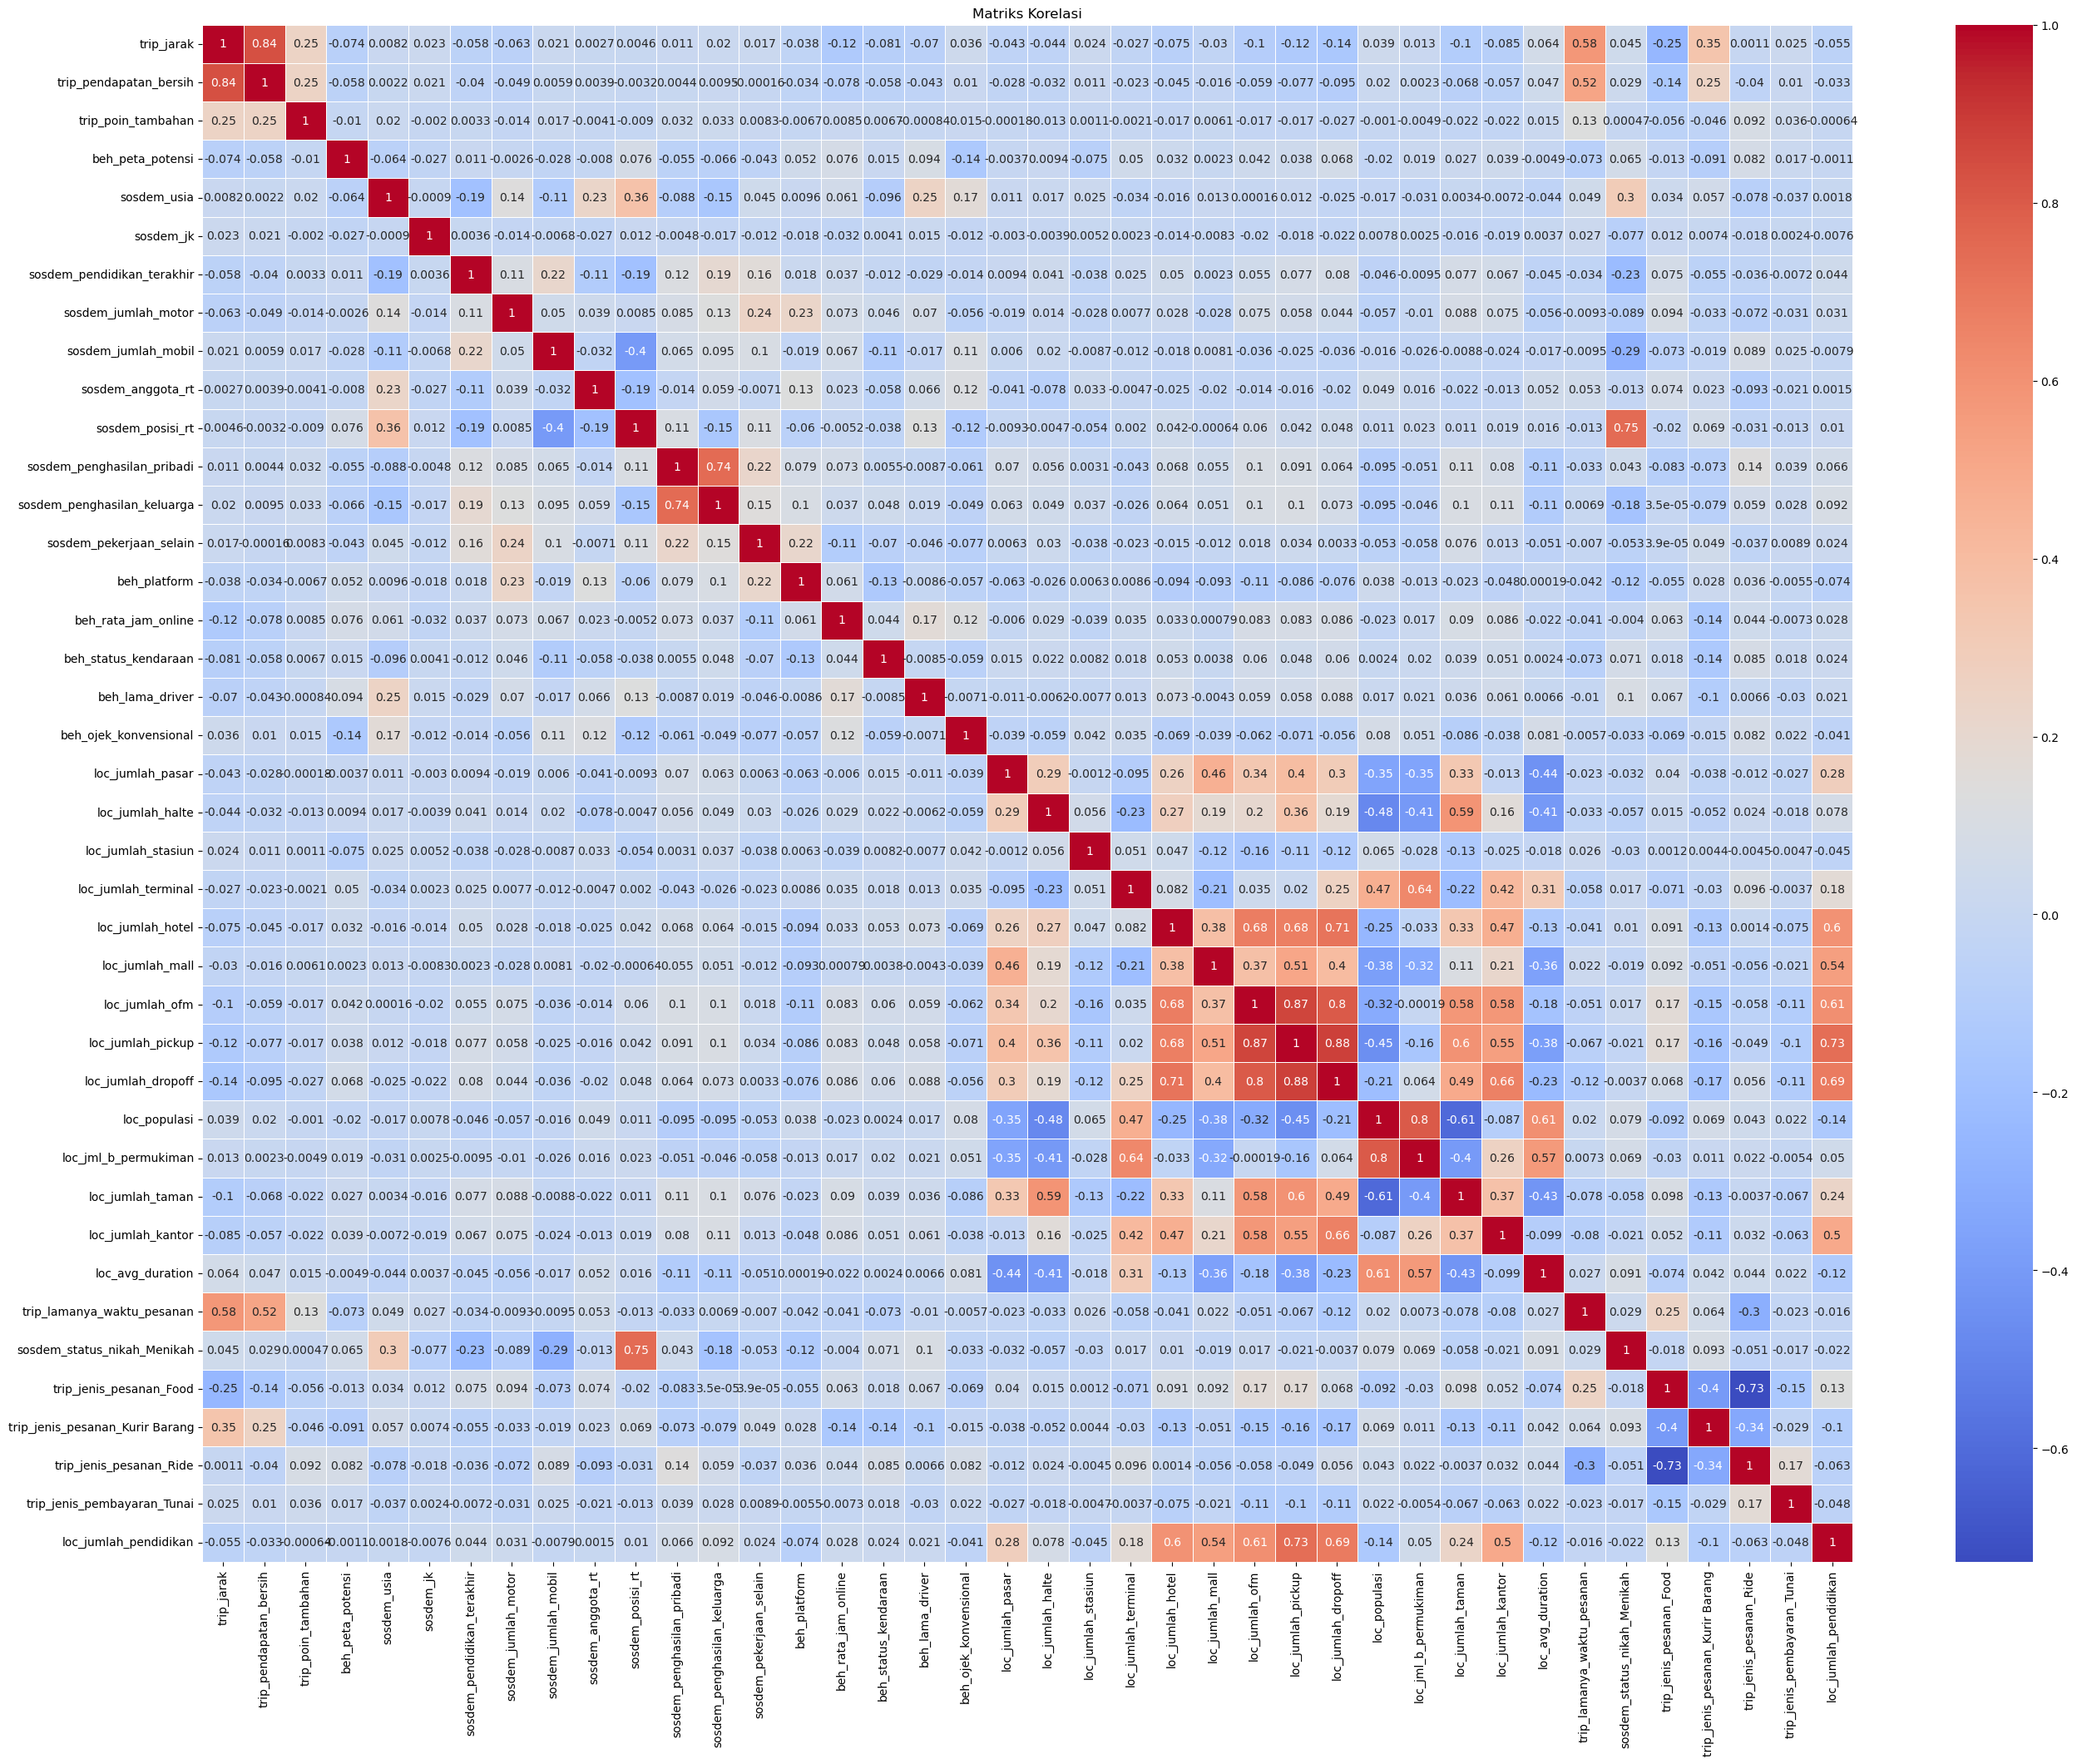

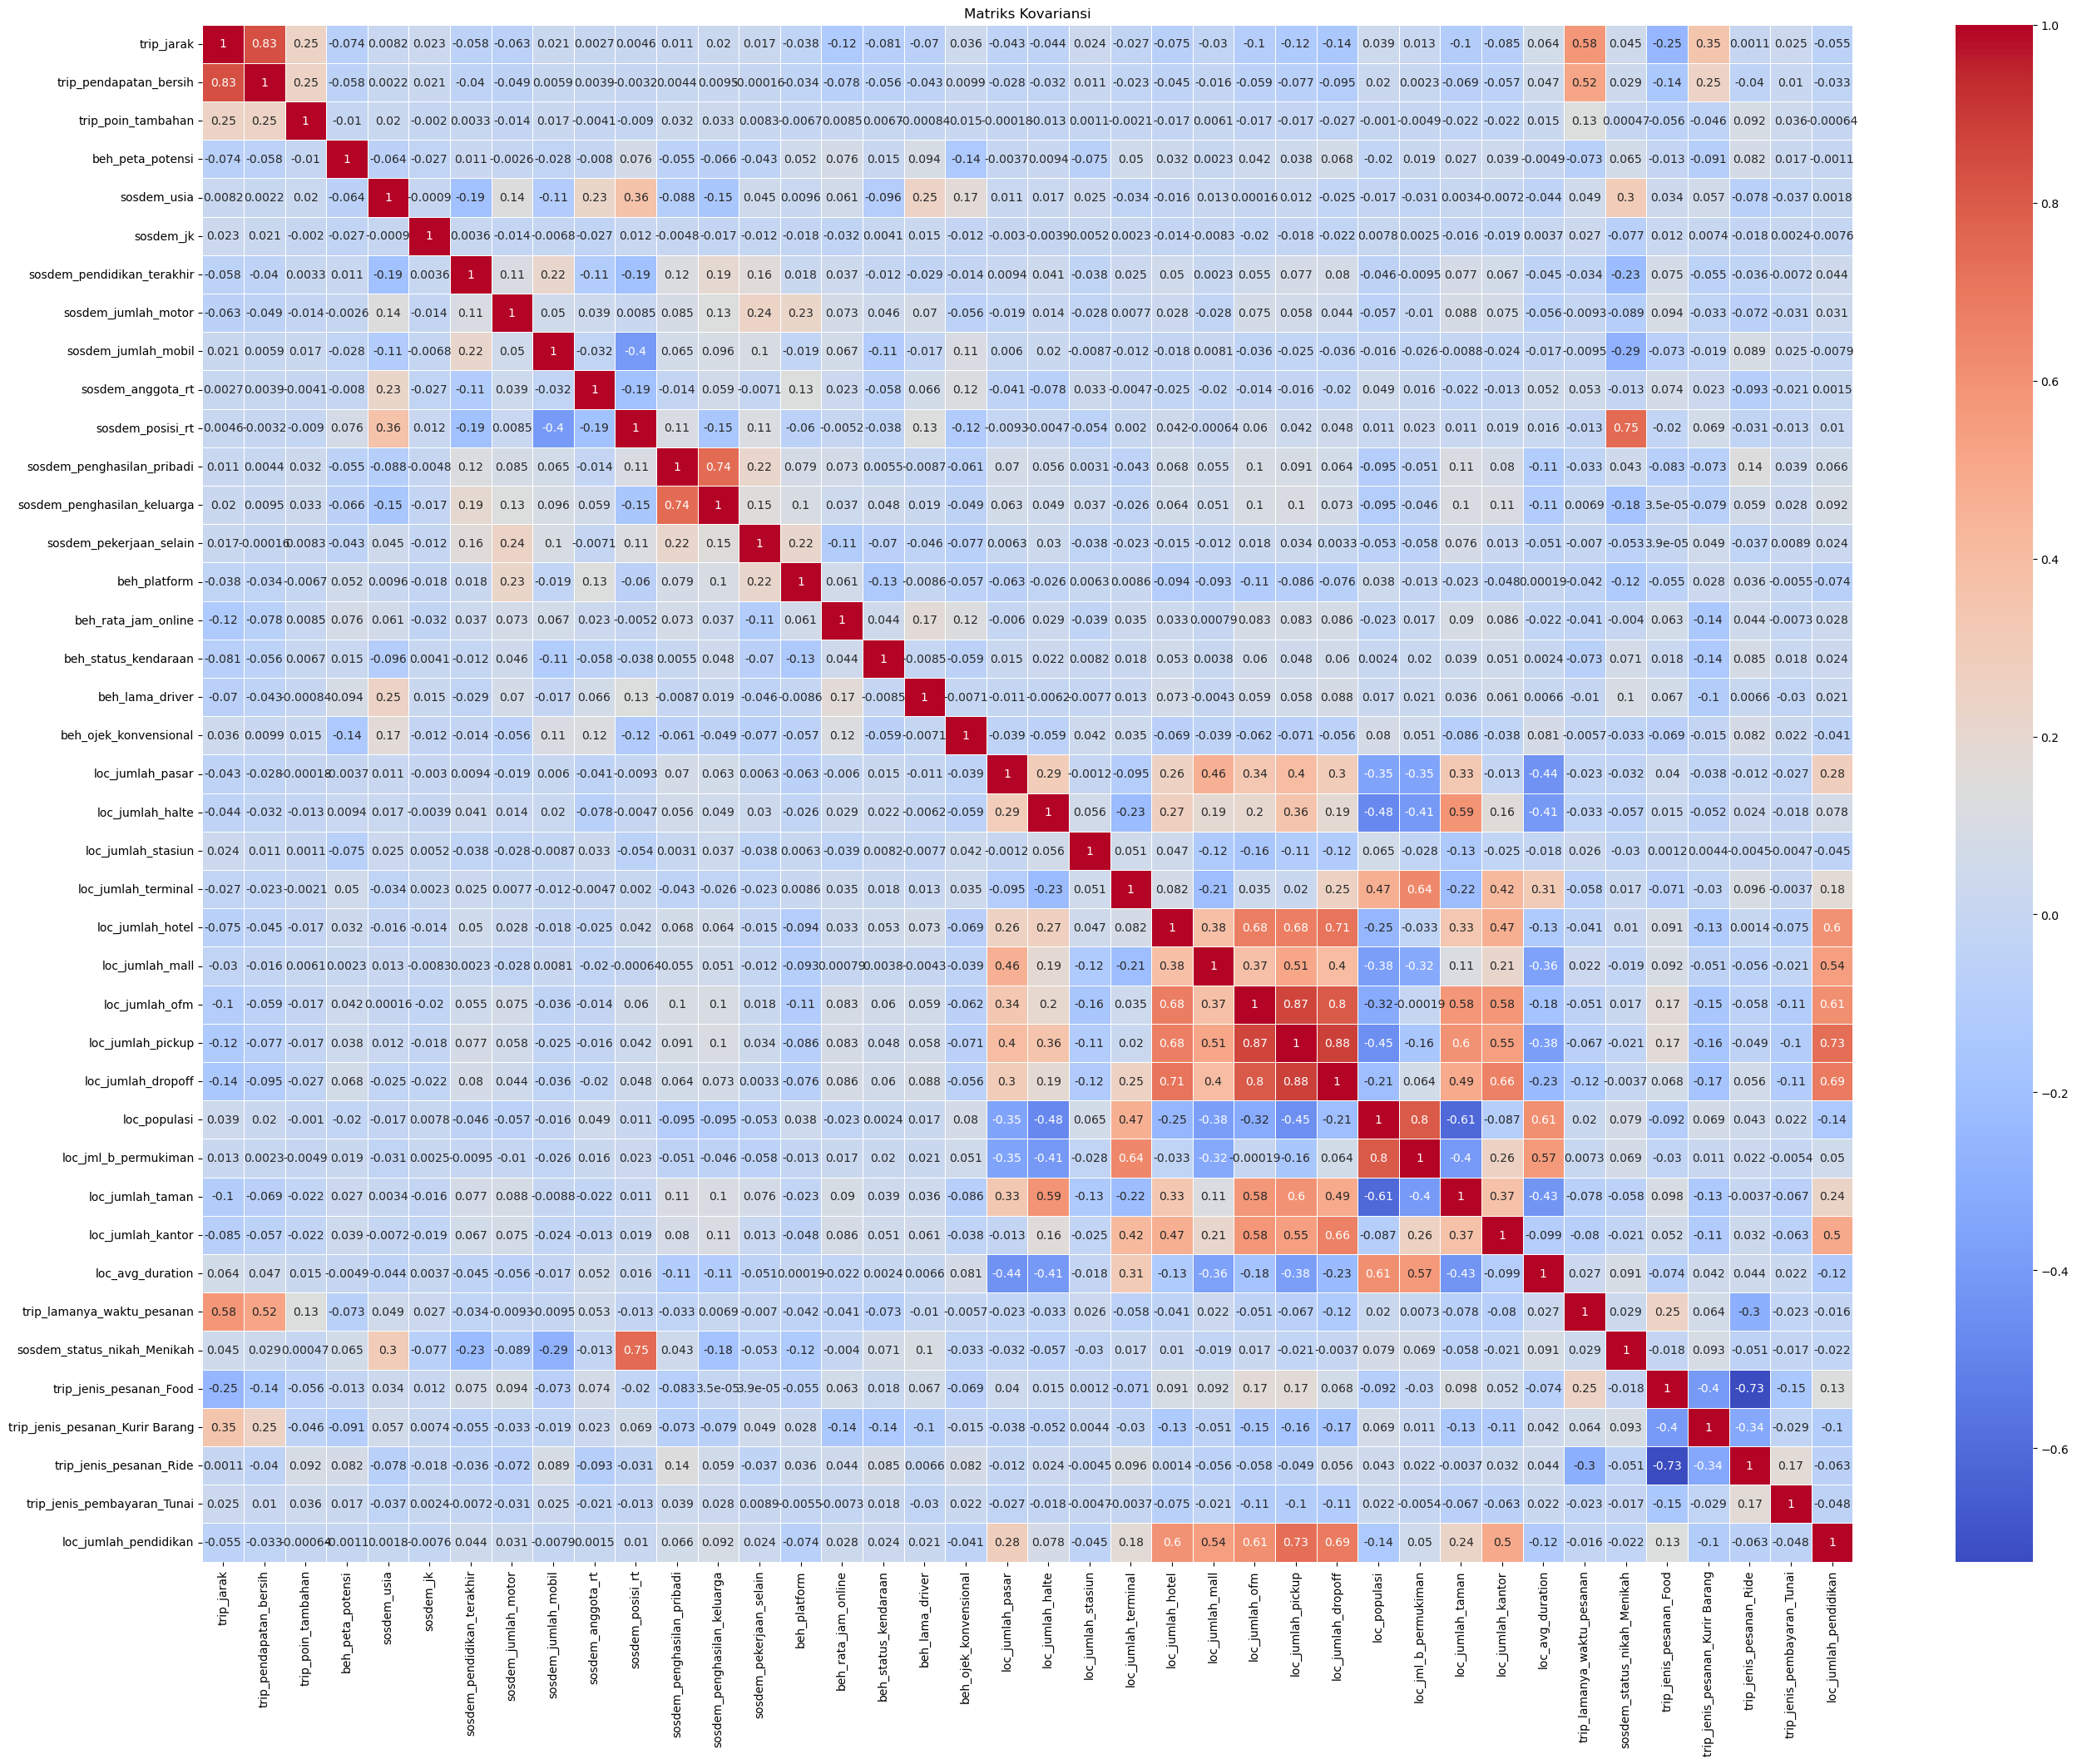

In [43]:
# Create heatmap for correlation matrix
plot_correlation_matrix(df_pca_std, "Matriks Korelasi")

# Create heatmap for covariance matrix
plot_covariance_matrix(df_pca_std, "Matriks Kovariansi")

In [44]:
threshold = 0.8
high_correlation_pairs = []
covariance_matrix = df_pca_std.cov()

for i in range(len(covariance_matrix.columns)):
    for j in range(i + 1, len(covariance_matrix.columns)):
        if abs(covariance_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((covariance_matrix.columns[i], covariance_matrix.columns[j]))

In [45]:
high_correlation_pairs

[('trip_jarak', 'trip_pendapatan_bersih'),
 ('loc_jumlah_ofm', 'loc_jumlah_pickup'),
 ('loc_jumlah_ofm', 'loc_jumlah_dropoff'),
 ('loc_jumlah_pickup', 'loc_jumlah_dropoff'),
 ('loc_populasi', 'loc_jml_b_permukiman')]

### Skenario 1
Tanpa menghapus data populasi ataupun jumlah bangunan

In [46]:
test1 = df_pca_std.drop(['loc_jumlah_pickup', 'loc_jumlah_dropoff'], axis=1)

In [47]:
# Menghapus baris yang memiliki missing values dari DataFrame
test1.dropna(inplace=True)

##### Tes Kecukupan (Adequacy Test)
Tes kecukupan pada analisis faktor ini bisa dilakukan dengan beberapa cara. Pada analisis ini dilakukan dengan 2 cara yaitu dengan Tes Bartlett dan Tes Kaiser-Meyer-Olkin (KMO).

* Tes Bartlett <br>
Tes ini dilakukan untuk mengetahui apakah matriks korelasi seluruh variabel dengan matriks identitas. Apabila matriks tersebut mirip dengan matriks identitas, maka semua variabel memiliki korelasi yang buruk. Tes Bartlett menghasilkan suatu p-value yang menunjukkan apakah perbedaan dengan matriks identitas signifikan atau tidak.

In [48]:
chi_square_value,p_value=calculate_bartlett_sphericity(test1)
print(f'chi-square: {chi_square_value}')
print(f'p-value: {p_value:.16f}')

chi-square: 544888.4445965152
p-value: 0.0000000000000000


Nilai p-value yang dihasilkan lebih kecil dari 0.05. Hal tersebut menunjukkan bahwa tes ini signifikan secara statistik dan perbedaan dari chi-square yang rendah.

* Kaiser-Meyer-Olkin <br>
Tes KMO ini digunakan untuk`kelayakan atau kecukupan sampel data dengan mengestimasi proporsi variansi dari seluruh variabel. Nilai KMO ini memiliki rentang 0 hingga 1 dengan nilai dibawah 0.6 menunjukkan data kurang layak.

In [49]:
kmo_all,kmo_model=calculate_kmo(test1)
print(f'Nilai KMO: {kmo_model:.16f}')

Nilai KMO: 0.6148499802880396


/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Nilai KMO lebih dari 0.6

### Skenario 2
Menghapus variabel jumlah bangunan

In [50]:
test2 = df_pca_std.drop(['loc_jumlah_pickup', 'loc_jumlah_dropoff','loc_jml_b_permukiman'], axis=1)

In [51]:
# Menghapus baris yang memiliki missing values dari DataFrame
test2.dropna(inplace=True)

In [52]:
chi_square_value,p_value=calculate_bartlett_sphericity(test2)
print(f'chi-square: {chi_square_value}')
print(f'p-value: {p_value:.16f}')

chi-square: 503536.9471354915
p-value: 0.0000000000000000


In [53]:
kmo_all,kmo_model=calculate_kmo(test2)
print(f'Nilai KMO: {kmo_model:.16f}')

Nilai KMO: 0.5904625081328330


/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


### Skenario 3
Menghapus variabel populasi

In [54]:
test3 = df_pca_std.drop(['loc_jumlah_pickup', 'loc_jumlah_dropoff','loc_populasi'], axis=1)

In [55]:
# Menghapus baris yang memiliki missing values dari DataFrame
test3.dropna(inplace=True)

In [56]:
chi_square_value,p_value=calculate_bartlett_sphericity(test3)
print(f'chi-square: {chi_square_value}')
print(f'p-value: {p_value:.16f}')

chi-square: 506126.0818549396
p-value: 0.0000000000000000


In [57]:
kmo_all,kmo_model=calculate_kmo(test3)
print(f'Nilai KMO: {kmo_model:.16f}')

Nilai KMO: 0.5841647810185376


/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Ternyata sama saja......
Jadi, pake test1 saja aman

##### Analisis Faktor
Jumlah faktor bisa dipilih melalui kriteria Kaisere dengan visualisasi screeplot nilai eigenvalues.

In [58]:
test1.shape

(24316, 38)

In [59]:
test1.head()

,trip_jarak,trip_pendapatan_bersih,trip_poin_tambahan,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,sosdem_anggota_rt,...,loc_jumlah_taman,loc_jumlah_kantor,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,trip_jenis_pembayaran_Tunai,loc_jumlah_pendidikan
0,0.269445,-0.290556,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.00635,...,-0.663855,-0.345961,-0.744483,-0.127276,0.455016,-0.934173,-0.430732,1.284253,-0.509441,-0.545315
1,3.111869,2.803357,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.00635,...,-0.663855,-0.635311,-0.793265,1.447810,0.455016,-0.934173,-0.430732,1.284253,-0.509441,-0.545315
2,-0.135095,-0.445251,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.00635,...,-0.663855,0.956114,-0.939209,-0.707570,0.455016,-0.934173,-0.430732,1.284253,-0.509441,0.373863
3,-0.291233,0.637618,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.00635,...,-0.007766,0.232739,2.588426,-0.375973,0.455016,1.070465,-0.430732,-0.778663,-0.509441,-0.545315
4,0.826574,1.179053,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.00635,...,-0.663855,-0.924661,-0.130084,-0.293074,0.455016,-0.934173,2.321627,-0.778663,-0.509441,-0.315520


In [61]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=39, rotation=None)
fa.fit(test1)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([4.63522468e+00, 2.93612400e+00, 2.59293450e+00, 2.40330319e+00,
       2.03226030e+00, 1.89175386e+00, 1.52213977e+00, 1.41882330e+00,
       1.33019510e+00, 1.19577504e+00, 1.12927344e+00, 1.07083447e+00,
       1.03803019e+00, 1.00437568e+00, 9.64927172e-01, 9.27998163e-01,
       8.91926537e-01, 8.17716689e-01, 8.10904239e-01, 7.73335369e-01,
       7.27581468e-01, 6.98384198e-01, 6.46865319e-01, 6.42577569e-01,
       5.80110693e-01, 5.31563350e-01, 4.66704064e-01, 3.76426145e-01,
       3.72177009e-01, 3.57146767e-01, 3.10977183e-01, 2.01747824e-01,
       1.68018739e-01, 1.64357236e-01, 1.36170708e-01, 1.28506619e-01,
       1.02762679e-01, 6.67486081e-05])

Melihat dalam bentuk screeplot.

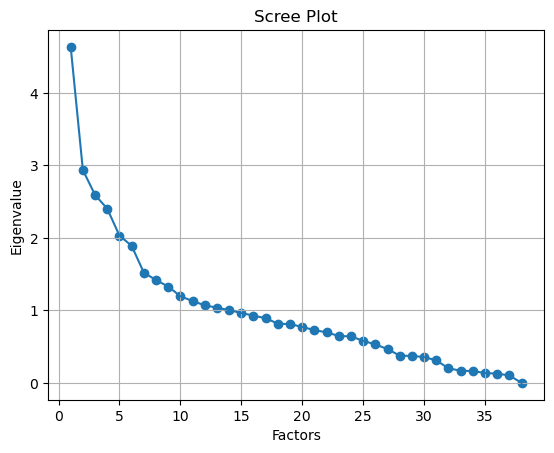

In [62]:
# Create scree plot using matplotlib
plt.scatter(range(1,test1.shape[1]+1),ev)
plt.plot(range(1,test1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Berdasarkan aturan Kaiser, jumlah faktor yang digunakan adalah 15 faktor karena ada 15 faktor yang memiliki eigenvalue lebih dari 1. Hal ini menandakan bahwa seluruh variabel memiliki korelasi yang tinggi dan merepresentasikan faktor yang sama. Setelah itu, kembali melakukan analisis faktor dengan jumlah faktor yang sudah ditentukan.

* Tidak rotate

In [63]:
factor_loadings_output, ss_loadings_df, proportion_var_df, cumulative_var_df = perform_factor_analysis(test1, 14)

Sorted factor loadings (pattern matrix) based upon communalities
                                       F1        F2        F3        F4        F5        F6        F7        F8        F9       F10       F11       F12       F13       F14  Communalities
sosdem_posisi_rt                -0.010505  0.066218  0.609468 -0.438695  0.494357  0.360955  0.024610 -0.060751 -0.185528  0.144575 -0.014229  0.087440 -0.047788  0.032291       1.013870
loc_jumlah_pasar                 0.591392 -0.147731  0.059606  0.020371  0.063875 -0.169859 -0.061266 -0.447494  0.167188  0.189792  0.557803  0.007293  0.112013 -0.005185       1.000219
trip_jenis_pesanan_Ride         -0.065866  0.104597 -0.412499  0.211209  0.769230 -0.212573  0.324999  0.019758  0.091467  0.097397 -0.050827 -0.023745  0.005133 -0.054712       0.996980
trip_jenis_pesanan_Food          0.230141  0.154150  0.165516 -0.330013 -0.799244  0.253464  0.259155 -0.043994 -0.085258  0.033579  0.045236  0.004249 -0.034749 -0.011702       0.996968


In [64]:
factor_loadings_output

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Communalities
sosdem_posisi_rt,-0.010505,0.066218,0.609468,-0.438695,0.494357,0.360955,0.024610,-0.060751,-0.185528,0.144575,-0.014229,0.087440,-0.047788,0.032291,1.013870
loc_jumlah_pasar,0.591392,-0.147731,0.059606,0.020371,0.063875,-0.169859,-0.061266,-0.447494,0.167188,0.189792,0.557803,0.007293,0.112013,-0.005185,1.000219
trip_jenis_pesanan_Ride,-0.065866,0.104597,-0.412499,0.211209,0.769230,-0.212573,0.324999,0.019758,0.091467,0.097397,-0.050827,-0.023745,0.005133,-0.054712,0.996980
trip_jenis_pesanan_Food,0.230141,0.154150,0.165516,-0.330013,-0.799244,0.253464,0.259155,-0.043994,-0.085258,0.033579,0.045236,0.004249,-0.034749,-0.011702,0.996968
trip_jenis_pesanan_Kurir Barang,-0.229317,-0.353267,0.325213,0.172257,0.071195,-0.064687,-0.793994,0.034236,-0.005147,-0.176993,0.005858,0.026139,0.041178,0.089889,0.995517
trip_jarak,-0.219443,-0.491158,0.482306,0.637764,0.041168,-0.025036,0.182294,0.084358,-0.011068,0.053481,0.009066,-0.007093,0.005483,0.006279,0.974606
loc_jumlah_taman,0.759185,-0.043533,-0.000731,-0.000413,0.087058,0.009202,0.002188,0.501868,-0.146286,-0.072787,0.211061,0.009596,0.137323,-0.087617,0.935668
loc_jumlah_ofm,0.687597,0.423798,0.270999,0.196366,0.001585,-0.062718,-0.026413,0.092206,-0.029796,-0.042272,-0.055178,0.040560,0.288663,-0.116141,0.881710
loc_jml_b_permukiman,-0.562726,0.666282,0.158939,0.230520,-0.056359,0.022741,-0.040369,0.021038,-0.025222,0.011760,0.144741,0.038477,0.064154,-0.011491,0.872212
sosdem_penghasilan_keluarga,0.211444,0.023824,-0.301639,0.409688,0.027442,0.635023,-0.003834,-0.167761,0.026003,-0.240683,0.041377,-0.072134,-0.002541,0.016826,0.802083


In [65]:
# Fungsi untuk menampilkan variabel dengan faktor loadings tertinggi
def top_loaded_variables(factor_name, n=1):
    sorted_df = factor_loadings_output[factor_name].sort_values(ascending=False)
    top_n = sorted_df.head(n)
    return top_n

In [67]:
top_variables_list = []  # List untuk menyimpan variabel teratas

# Loop melalui faktor F1 hingga F14 dan simpan variabel teratas dalam list
for factor_number in range(1, 15):
    factor_name = 'F' + str(factor_number)
    top_variable = top_loaded_variables(factor_name)
    top_variables_list.append(top_variable)

# Menampilkan list variabel teratas
print("\nTop Loaded Variables List:")
for variable in top_variables_list:
    print(variable)


Top Loaded Variables List:
loc_jumlah_taman    0.759185
Name: F1, dtype: float64
loc_jml_b_permukiman    0.666282
Name: F2, dtype: float64
sosdem_posisi_rt    0.609468
Name: F3, dtype: float64
trip_jarak    0.637764
Name: F4, dtype: float64
trip_jenis_pesanan_Ride    0.76923
Name: F5, dtype: float64
sosdem_penghasilan_pribadi    0.68963
Name: F6, dtype: float64
trip_jenis_pesanan_Ride    0.324999
Name: F7, dtype: float64
loc_jumlah_taman    0.501868
Name: F8, dtype: float64
sosdem_usia    0.595618
Name: F9, dtype: float64
sosdem_pekerjaan_selain    0.430762
Name: F10, dtype: float64
loc_jumlah_pasar    0.557803
Name: F11, dtype: float64
sosdem_jumlah_mobil    0.342966
Name: F12, dtype: float64
loc_jumlah_ofm    0.288663
Name: F13, dtype: float64
beh_rata_jam_online    0.314056
Name: F14, dtype: float64


Variabel terpilih:
* loc_jumlah_taman    
* loc_jml_b_permukiman    
* sosdem_posisi_rt    
* trip_jenis_pesanan_Ride    
* sosdem_penghasilan_pribadi       
* sosdem_usia    
* sosdem_pekerjaan_selain    
* loc_jumlah_ofm   
* sosdem_jumlah_mobil   
* loc_jumlah_pasar 
* beh_rata_jam_online    

In [68]:
test1.head()

,trip_jarak,trip_pendapatan_bersih,trip_poin_tambahan,beh_peta_potensi,sosdem_usia,sosdem_jk,sosdem_pendidikan_terakhir,sosdem_jumlah_motor,sosdem_jumlah_mobil,sosdem_anggota_rt,...,loc_jumlah_taman,loc_jumlah_kantor,loc_avg_duration,trip_lamanya_waktu_pesanan,sosdem_status_nikah_Menikah,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,trip_jenis_pembayaran_Tunai,loc_jumlah_pendidikan
0,0.269445,-0.290556,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.00635,...,-0.663855,-0.345961,-0.744483,-0.127276,0.455016,-0.934173,-0.430732,1.284253,-0.509441,-0.545315
1,3.111869,2.803357,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.00635,...,-0.663855,-0.635311,-0.793265,1.447810,0.455016,-0.934173,-0.430732,1.284253,-0.509441,-0.545315
2,-0.135095,-0.445251,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.00635,...,-0.663855,0.956114,-0.939209,-0.707570,0.455016,-0.934173,-0.430732,1.284253,-0.509441,0.373863
3,-0.291233,0.637618,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.00635,...,-0.007766,0.232739,2.588426,-0.375973,0.455016,1.070465,-0.430732,-0.778663,-0.509441,-0.545315
4,0.826574,1.179053,-0.057793,-0.088364,-0.384722,-0.035074,0.103689,-0.394344,-0.194808,-0.00635,...,-0.663855,-0.924661,-0.130084,-0.293074,0.455016,-0.934173,2.321627,-0.778663,-0.509441,-0.315520
